# Solving a GE model

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import bisect

## Preferences

Two consumers have the preferences:
$$ U_i(X_i,Y_i) = \log X_i + \alpha \log Y_i $$
Their demands are :
$$X_{i,d} = \frac{1}{1+\alpha} I_i$$
$$Y_{i,d} = \frac{\alpha}{1+\alpha} \frac{I_i}{p}$$
where income is $$X_{i} + p Y_{i} + \rho_i \Pi$$


In [ ]:
alpha = 2
rho = [0.0,1.0]
xe  = [2.0,0.0]
ye  = [0.0,0.0]
def u(x,y,alpha):
    return np.log(x) + alpha*np.log(y)
def fxd(p,income,alpha):
    return (1.0/(1.0+alpha))*income
def fyd(p,income,alpha):
    return (alpha/(1.0+alpha))*income/p
def finc(xe,ye,p,rho,profit):
    return xe + p*ye + rho*profit

In [5]:
finc(2.0,0.0,0.0,0.5,100.0)

52.0

## Firm

The firm is a price taker and has the following production function:
$$ Y = F(X) = \log(1+X) $$
She maximizes profits, taking price $p$ as given. She has the input demand:
$$ X_{f,d} = p - 1 $$ 

and therefore an offer curve of $Y_{f,s} = \log p$. 

In [ ]:
def fxf(p):
    return p-1.0
def fyf(p):
    return np.log(p)

Her profits are given by:
    $$ \Pi = p\log p - p + 1 $$ 

In [ ]:
def fprofit(p):
    return p*np.log(p) - p + 1.0

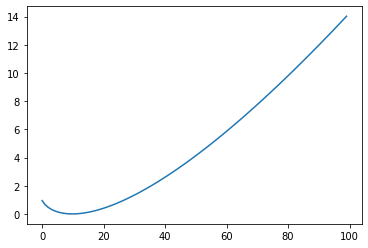

In [9]:
plt.plot([fprofit(p) for p in np.linspace(0.01,10,100)])

## Price

The equilibrium price is given by:

In [ ]:
def xequilibrium(p,alpha,rho,xe,ye):
    # firms
    xf = fxf(p)
    yf = fyf(p)
    profit = fprofit(p)
    # consumers
    xd = [0.0,0.0]
    for i in range(2):
        income = finc(xe[i],ye[i],p,rho[i],profit)
        xd[i] = fxd(p,income,alpha)
    # excess demand for x
    excess = np.sum(xd) + xf - np.sum(xe)
    return excess


We can look at excess demand as a function of the price

In [ ]:
prices = np.linspace(0.1,10.0,100)
mx = [xequilibrium(p,alpha,rho,xe,ye) for p in prices]

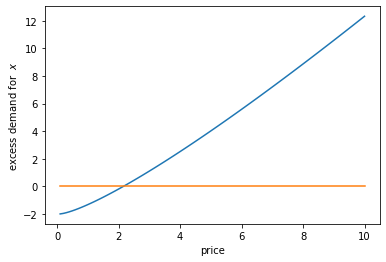

In [12]:
plt.figure()
plt.plot(prices,mx,label='xd - xe')
plt.plot(prices,np.zeros(len(prices)))
plt.xlabel('price')
plt.ylabel('excess demand for  $x$')
plt.show()

In [13]:
print([(p,m) for p,m in zip(prices,mx)])

[(0.1, -2.0100861697664683), (0.2, -1.9739625274956067), (0.30000000000000004, -1.9203972804325935), (0.4, -1.855505430916554), (0.5, -1.782191196759991), (0.6, -1.7021651247531984), (0.7000000000000001, -1.6165574869190376), (0.8, -1.5261716136837893), (0.9, -1.431608154697348), (1.0, -1.3333333333333335), (1.1, -1.2317196007384141), (1.2000000000000002, -1.1270713772824181), (1.3000000000000003, -1.0196421520640868), (1.4000000000000001, -0.9096462895767672), (1.5000000000000002, -0.7972674459459177), (1.6, -0.6826647310689409), (1.7000000000000002, -0.5659773243981032), (1.8000000000000003, -0.4473280010587284), (1.9000000000000001, -0.3268258720908166), (2.0, -0.20456854629336974), (2.1, -0.0806438586894358), (2.2, 0.04486873093379806), (2.3000000000000003, 0.17189699425024685), (2.4000000000000004, 0.30037498988312006), (2.5000000000000004, 0.43024227656179637), (2.6, 0.5614432523571118), (2.7, 0.6939265957092551), (2.8000000000000003, 0.8276447893690815), (2.9000000000000004, 0.9

We can use bisection to find the equilibrium price

In [14]:
pstar = bisect(xequilibrium, 0.01, 10.0, args=(alpha,rho,xe,ye)) 
pstar

2.1643929182195403

And back out demands 

In [15]:
xf = fxf(pstar)
yf = fyf(pstar)
profit = fprofit(pstar)
print('firm (xf,yf,profit) = ',xf,yf,profit)
xd = [0.0,0.0]
yd = [0.0,0.0]
for i in range(2):
    income = finc(xe[i],ye[i],pstar,rho[i],profit)
    xd[i] = fxd(pstar,income,alpha)
    yd[i] = fyd(pstar,income,alpha)
    fyd(pstar,income,alpha)
    print('consumer'+str(i)+' (income,xd,yd,u) = ',income,xd[i],yd[i],u(xd[i],yd[i],alpha))


firm (xf,yf,profit) =  1.1643929182195403 0.7721399148440825 0.5068212453436307
consumer0 (income,xd,yd,u) =  2.0 0.6666666666666666 0.6160310921873426 -1.3743807928927678
consumer1 (income,xd,yd,u) =  0.5068212453436307 0.16894041511454355 0.15610882265639298 -5.492613067111362


## Experiments

What happens to the price when we change  $\alpha$?

In [ ]:
alphas = np.linspace(0.5,3.0,100)
pstars = [bisect(xequilibrium, 0.01, 10.0, args=(alpha,rho,xe,ye)) for alpha in alphas]

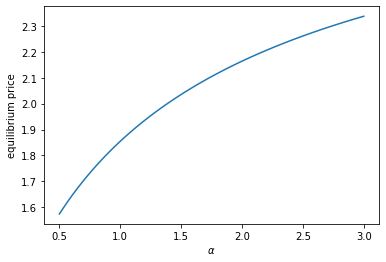

In [ ]:
plt.figure()
plt.plot(alphas,pstars)
plt.xlabel('$\\alpha$')
plt.ylabel('equilibrium price')
plt.show()

And if we change $\rho$?

In [ ]:
rhos = np.linspace(0.1,0.9,100)
pstars = [bisect(xequilibrium, 0.01, 10.0, args=(alpha,[rho,1.0-rho],xe,ye)) for rho in rhos]

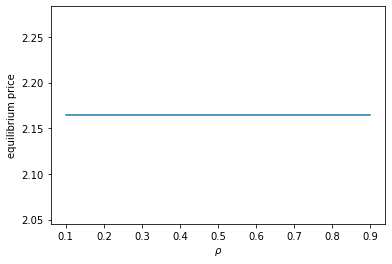

In [18]:
plt.figure()
plt.plot(rhos,pstars)
plt.xlabel('$\\rho$')
plt.ylabel('equilibrium price')
plt.show()